In [1]:
import cv2
import albumentations as A
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader, ConcatDataset

from sds_playground.datasets import M2CaiSegDataset

In [2]:
train_ds = M2CaiSegDataset(
    root='/local/scratch/M2CaiSeg/',
    spatial_transform=A.Compose([
        A.Resize(128, 128, interpolation=cv2.INTER_LINEAR)
    ]),
    img_normalization=A.Normalize(.5, .5),
    mode='train'
)
val_ds = M2CaiSegDataset(
    root='/local/scratch/M2CaiSeg/',
    spatial_transform=A.Compose([
        A.Resize(128, 128, interpolation=cv2.INTER_LINEAR)
    ]),
    img_normalization=A.Normalize(.5, .5),
    mode='val'
)
test_ds = M2CaiSegDataset(
    root='/local/scratch/M2CaiSeg/',
    spatial_transform=A.Compose([
        A.Resize(128, 128, interpolation=cv2.INTER_LINEAR)
    ]),
    img_normalization=A.Normalize(.5, .5),
    mode='test'
)
dl = DataLoader(ConcatDataset([train_ds, test_ds, val_ds]), shuffle=True, batch_size=4)

In [3]:
img, mask, name = next(iter(dl))

In [4]:
img.shape

torch.Size([4, 3, 128, 128])

In [5]:
mask.shape

torch.Size([4, 128, 128, 3])

In [6]:
name

('val/47950.jpg', 'train/26450.jpg', 'train/54175.jpg', 'val/25075.jpg')

In [7]:
from sds_playground.utils import denormalize

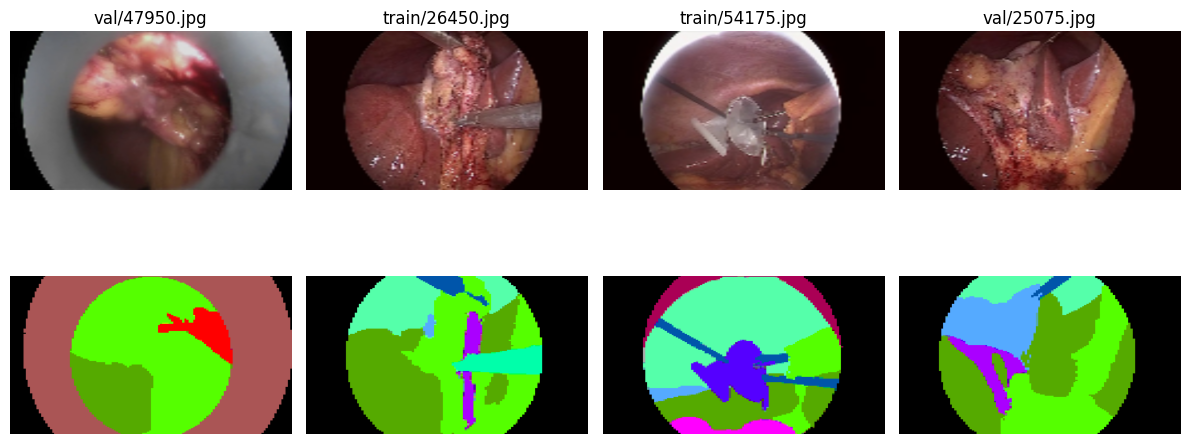

In [8]:
fig, ax = plt.subplots(2, img.shape[0], figsize=(img.shape[0]*3, 2*3))
_img = F.interpolate(img, train_ds.display_shape[1:], mode='bilinear')
_mask = F.interpolate(mask.permute(0, 3, 1, 2), train_ds.display_shape[1:], mode='nearest')
for n in range(img.shape[0]):
    ax[0, n].imshow(denormalize(_img[n], .5, .5).permute(1, 2, 0).cpu().numpy())
    ax[0, n].axis('off')
    ax[0, n].set_title(name[n])
    ax[1, n].imshow(_mask[n].permute(1, 2, 0).cpu().numpy())
    ax[1, n].axis('off')
plt.autoscale()
plt.tight_layout()
plt.show()

In [9]:
torch.unique(mask)

tensor([  0,  85, 170, 255], dtype=torch.uint8)

In [10]:
all_masks = None
for img, mask, name in dl:
    all_masks = mask if all_masks is None else torch.cat([all_masks, mask], dim=0)

In [18]:
import numpy as np
# Assuming masks is your (N, H, W, 3) numpy array
np_all_masks = all_masks.numpy()
reshaped = np_all_masks.reshape(-1, 3)  # Reshape so that each row is an RGB triplet
unique_rgb_values = np.unique(reshaped, axis=0)

In [19]:
unique_rgb_values

array([[  0,   0,   0],
       [  0,   0,  85],
       [  0,   0, 170],
       [  0,  85,   0],
       [  0,  85,  85],
       [  0,  85, 170],
       [  0,  85, 255],
       [  0, 170,   0],
       [  0, 170,  85],
       [  0, 170, 170],
       [  0, 255,   0],
       [  0, 255,  85],
       [  0, 255, 170],
       [ 85,   0,   0],
       [ 85,   0,  85],
       [ 85,   0, 170],
       [ 85,   0, 255],
       [ 85,  85,   0],
       [ 85,  85,  85],
       [ 85,  85, 170],
       [ 85,  85, 255],
       [ 85, 170,   0],
       [ 85, 170,  85],
       [ 85, 170, 170],
       [ 85, 170, 255],
       [ 85, 255,   0],
       [ 85, 255,  85],
       [ 85, 255, 170],
       [170,   0,   0],
       [170,   0,  85],
       [170,   0, 170],
       [170,   0, 255],
       [170,  85,   0],
       [170,  85,  85],
       [170,  85, 170],
       [170,  85, 255],
       [170, 170,   0],
       [170, 170,  85],
       [170, 170, 170],
       [170, 170, 255],
       [170, 255,   0],
       [255,   0